In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from KNN import *
from collections import Counter

In [2]:
#import all the datasets

training_set = pd.read_csv('training_set.csv')
validation_set = pd.read_csv('validation_set.csv')
test_set = pd.read_csv('test_set.csv')


In [3]:
#notice the imbalanced dataset
print(validation_set['credit_card_default'].value_counts())
print(training_set['credit_card_default'].value_counts())
print(test_set['credit_card_default'].value_counts())

0.0    6275
1.0     555
Name: credit_card_default, dtype: int64
0.0    29281
1.0     2588
Name: credit_card_default, dtype: int64
0.0    6275
1.0     554
Name: credit_card_default, dtype: int64


In [4]:
#Oversample the training set

X, y = training_set.iloc[:,:-1], training_set.iloc[:, -1]
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X,y)

X_resampled['credit_card_default'] = y_resampled

In [5]:
X_resampled['credit_card_default'].value_counts()

0.0    29281
1.0    29281
Name: credit_card_default, dtype: int64

In [6]:
#converts dataframes into arrays, because that's what we wrote our algorithm for

training = [[i for i in X_resampled.iloc[j]] for j in range(len(X_resampled))]
validation = [[i for i in validation_set.iloc[j]] for j in range(len(validation_set))]


In [7]:
#True negative = 0
#True positive = 1
#False negative = 2
#False positive = 3


def checker(example, output):
    #was prediction correct
    if example[-1]==output:
        #true positive
        if output==1.0:
            return 1
        #true negative
        else:
            return 0
    #false positive    
    elif output==1.0:            
        return 3
    #false negative
    else:
        return 2
            

In [8]:
#calculates if it is correct for K=1,...,max_value inclusive

def actual_knn(training_set, example, max_value):
    
    #first we find the euclidean distance from all points
    sorted_distance = nearest_neighbours(training_set, example)
    
    prediction = []
    for k in range(1,max_value+1):
        
        #for each value k, calculate the most common label for the closest k
 
        output = knn(training_set , sorted_distance, k)

        #check if this aligns with the true value
        #appends this to the prediction
        prediction.append(checker(example,output))
        
    return prediction
        

In [9]:
def total_knn(training_set, validation_set, max_value):
    all_predictions = []
    counter=0
    
    for i in validation_set:
        counter+=1
        print(counter)
        prediction_array = actual_knn(training_set, i , max_value)
        all_predictions.append(prediction_array)
        
    prediction_matrix = np.array(all_predictions)
    
    return np.transpose(all_predictions)

In [10]:
#predictions = total_knn(training, validation, 250)

In [11]:
#np.save('predictions.npy',predictions)

In [12]:
predictions = np.load('predictions.npy')

In [13]:
q = Counter(predictions[1])
print(q)
q[1]

Counter({0: 6105, 1: 459, 3: 170, 2: 96})


459

In [23]:
#True negative = 0
#True positive = 1
#False negative = 2
#False positive = 3

def Accuracy(predictions):
    accuracy = []
    for i in predictions:
        outcomes = Counter(i)
        
        true = outcomes[0] + outcomes[1]
        #false = outcomes[2] + outcomes[3]
        
        score = true / len(i)
        accuracy.append(score)
    return accuracy

def Precision(predictions):
    precision = []
    for i in predictions:
        outcomes = Counter(i)
        
        true = outcomes[1]
        total = outcomes[3] + true
        
        score = true / total
        precision.append(score)
    return precision

def Recall(predictions):
    recall = []
    for i in predictions:
        outcomes = Counter(i)
        
        true = outcomes[1]
        total = outcomes[1] + outcomes[2]
        
        score = true / total
        recall.append(score)
    return recall

def F_score(predictions,k=1):
    recall = np.array(Recall(predictions))
    precision = np.array(Precision(predictions))
    beta = k**2
    f_score = ((1+beta) * (precision * recall)) / ((beta * precision) + recall)
    
    return f_score



In [31]:
accuracy = Accuracy(predictions)
precision = Precision(predictions)
recall = Recall(predictions)
f = F_score(predictions)
f2 = F_score(predictions,2)

print(accuracy)
print(precision)
print(recall)
print(f)

[0.9610541727672035, 0.9610541727672035, 0.9556368960468521, 0.9575402635431918, 0.9484626647144949, 0.9512445095168375, 0.9448023426061494, 0.9464128843338214, 0.9426061493411421, 0.9446559297218156, 0.9399707174231332, 0.9418740849194729, 0.9358711566617862, 0.9398243045387994, 0.93601756954612, 0.9379209370424597, 0.934407027818448, 0.9367496339677892, 0.9339677891654465, 0.935285505124451, 0.9336749633967789, 0.9345534407027818, 0.9333821376281113, 0.93601756954612, 0.9330893118594437, 0.9351390922401172, 0.9330893118594437, 0.9349926793557833, 0.9322108345534407, 0.9336749633967789, 0.931918008784773, 0.9339677891654465, 0.9308931185944364, 0.9326500732064422, 0.9306002928257686, 0.9323572474377745, 0.9295754026354319, 0.9310395314787702, 0.9282576866764275, 0.9307467057101025, 0.9288433382137629, 0.9304538799414348, 0.9286969253294289, 0.9297218155197657, 0.9288433382137629, 0.9300146412884334, 0.9285505124450951, 0.9304538799414348, 0.9288433382137629, 0.9316251830161054, 0.9292

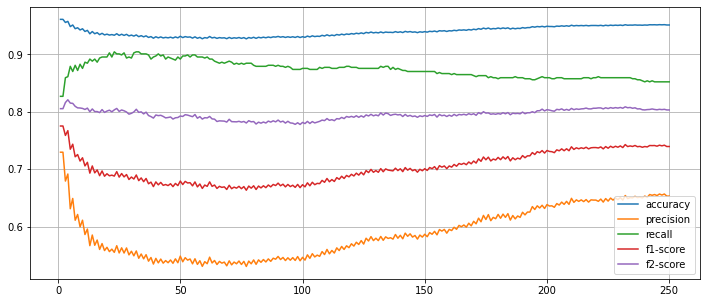

In [32]:
x = np.arange(1,len(precision) + 1)

plt.figure(figsize=(12,5))
plt.plot(x,accuracy,label='accuracy')
plt.plot(x,precision,label='precision')
plt.plot(x,recall,label='recall')
plt.plot(x,f,label='f1-score')
plt.plot(x,f2,label='f2-score')
plt.legend()
plt.grid(which='both')
plt.show()